# UE709 Network and Algorithms

## Practical Work 4 - Asif Mammadov

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
data = pd.read_csv('sample_network.csv')
data

,Source,Sink,Kbps_AVG
0,2,1,74752
1,3,2,79872
2,4,2,102400
3,5,2,30720
4,6,2,25600
...,...,...,...
319,96,91,29696
320,93,92,82944
321,94,92,84992
322,94,93,65536


In [2]:
G = nx.from_pandas_edgelist(data, source='Source', target='Sink', edge_attr=True, create_using=nx.DiGraph)

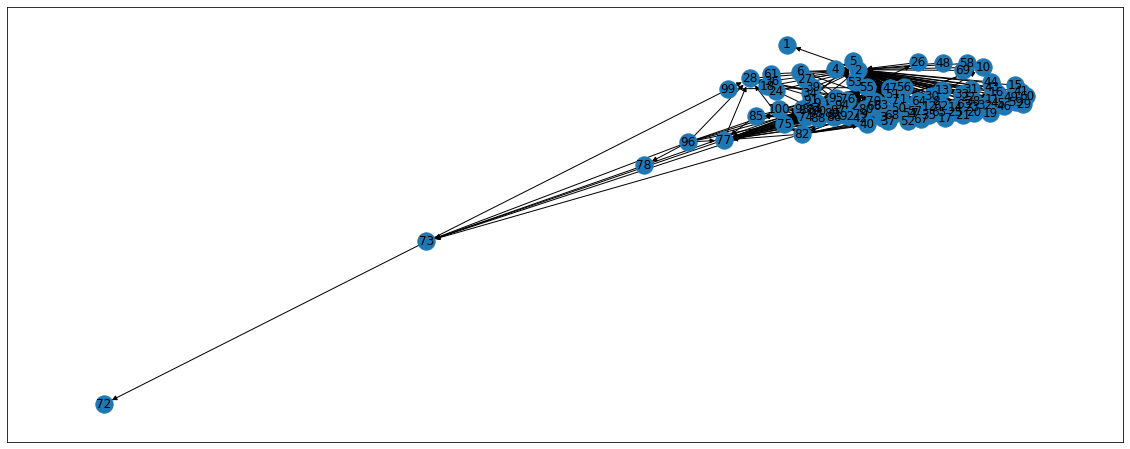

In [3]:
plt.figure(figsize=(20, 8))
nx.draw_networkx(G, with_labels=True)
plt.show()

In [4]:
# Degree Connectivity
def degree_inflow(G, node):
    return G.in_degree(node)
def degree_outflow(G, node):
    return G.out_degree(node)
def degree(G, node):
    return G.degree(node)


# Closeness Centrality
def path_length(path):
    return len(path) - 1

def closeness_centrality(G, node, weight):
    total_length = 0
    count = 0
    nodes = list(G.nodes())
    for dest in nodes:
        if dest != node and nx.has_path(G, node, dest):
            path = nx.shortest_path(G, source=node, target=dest, weight=weight)
            total_length += path_length(path)
            count += 1
    if count == 0:
        return np.NaN
    return total_length/count


# Betweenness Centrality
def get_path(G, src, dst, weight):
    try:
        return nx.shortest_path(G, src, dst, weight)
    except:
        return []
    
def get_all_pathes(G, weight):
    pathes = {}
    for src in G.nodes():
        for dst in G.nodes():
            if src != dst:
                path = get_path(G, src, dst, weight)
                if len(path) > 1:
                    pathes[str(src) + '_' + str(dst)] = path
    return pathes

def between_centrality(G, node, pathes):
    count = 0
    for path in pathes.values():
        if node in path:
            count += 1
    return count


# Network Density
def network_density(G):
    nodes = G.nodes()
    total_degree = 0
    for node in nodes:
        total_degree += degree(G, node)
    return total_degree/(len(nodes) * (len(nodes) - 1))


# Network Diameter
def network_diameter(G, weight):
    pathes = get_all_pathes(G, weight)
    path_len = 0
    for path in pathes.values():
        if len(path) > path_len:
            path_len = len(path)
    return path_len


# Network Average Path Length
def network_average_path_length(G, weight):
    pathes = get_all_pathes(G, weight)
    total_path_len = 0
    for path in pathes.values():
        total_path_len += len(path)
    return total_path_len/len(pathes)



In [5]:
print("Degrees")
print("%4s %7s %7s %7s" % ("Node", "Inflow", "Outflow", "Total"))
for node in G.nodes():
    print("%4s %7d %7d %7d" % (node, degree_inflow(G, node), degree_outflow(G, node), degree(G, node)))

Degrees
Node  Inflow Outflow   Total
   2      69       1      70
   1       1       0       1
   3       0       1       1
   4       2       1       3
   5       3       2       5
   6       4       1       5
   7       3       2       5
   8       4       2       6
   9       0       1       1
  10       3       1       4
  11       3       1       4
  12       3       2       5
  13       2       3       5
  14       4       4       8
  15       0       1       1
  16       1       1       2
  17       2       1       3
  18       0       1       1
  19       0       1       1
  20       0       1       1
  21       0       1       1
  22       1       1       2
  23       0       1       1
  24       0       1       1
  25       0       1       1
  26       1       1       2
  27       0       1       1
  28       8       1       9
  29       0       1       1
  30       0       1       1
  31       0       1       1
  32       0       1       1
  33       0       1       1
  34  

In [6]:
# Closeness Centrality

print("Closeness centrality")
print("%s %10s" % ("Node", "Kbps_AVG"))
for node in G.nodes():
    print("%3s %10.2f" % (node, closeness_centrality(G, node, 'Kbps_AVG')))

Closeness centrality
Node   Kbps_AVG
  2       1.00
  1        nan
  3       1.50
  4       1.50
  5       1.33
  6       1.50
  7       1.33
  8       1.50
  9       1.50
 10       1.50
 11       1.50
 12       1.33
 13       1.25
 14       1.40
 15       1.50
 16       1.50
 17       1.50
 18       1.50
 19       1.50
 20       1.50
 21       1.50
 22       1.50
 23       1.50
 24       1.50
 25       1.50
 26       1.50
 27       1.50
 28       1.50
 29       1.50
 30       1.50
 31       1.50
 32       1.50
 33       1.50
 34       1.50
 35       1.50
 36       1.50
 37       1.50
 38       1.50
 39       1.50
 40       1.50
 41       1.50
 42       1.50
 43       1.50
 44       1.50
 45       1.50
 46       1.50
 47       1.50
 48       1.50
 49       1.50
 50       1.83
 51       1.57
 52       1.50
 53       1.50
 54       1.25
 55       1.60
 56       2.33
 57       1.33
 58       1.50
 59       1.50
 60       1.50
 61       1.50
 62       1.50
 63       1.50
 64       1.50
 65

In [7]:
print("Betweenness Centrality")
print("%s %10s" % ("Node", "Kbps_AVG"))
pathes = get_all_pathes(G, "Kbps_AVG")
for node in G.nodes():
    print("%s %10d" % (node, between_centrality(G, node, pathes)))

Betweenness Centrality
Node   Kbps_AVG
2        195
1         98
3          2
4         31
5         35
6         32
7         55
8         39
9          2
10         28
11         31
12         58
13         31
14        109
15          2
16         28
17         28
18          2
19          2
20          2
21          2
22         19
23          2
24          2
25          2
26         26
27          2
28         32
29          2
30          2
31          2
32          2
33          2
34          2
35          2
36          2
37          2
38          2
39          2
40         28
41          2
42          2
43          3
44          2
45         28
46         33
47         33
48          2
49          2
50         55
51         15
52          2
53          2
54         55
55         61
56         32
57        224
58          2
59          2
60         18
61          2
62          2
63          2
64          2
65          2
66          2
67          2
68          2
69          2
70  

In [8]:
# Network Density
print("Network Density: %.2f" % network_density(G))
print("Network Diameter : %d" % network_diameter(G, 'Kbps_AVG'))
print("Network Average Path Length : %.2f" % network_average_path_length(G, 'Kbps_AVG'))

Network Density: 0.07
Network Diameter : 7
Network Average Path Length : 3.39


In [1]:
def max_flow_edmonds_karp(G, s, t, weight):
    # Init capacities
    flow_edges = {}
    flow_edges_res = {}
    for i, j in G.edges():
        flow_edges[str(i) + '_' + str(j)] = [0, G.edges[i,j][weight]]
        flow_edges_res[str(j) + '_' + str(i)] = [0, 0]
    flow = 0

    while (True):
        parent = [-1] * len(flow_edges)
        q = []
        q.append(s)
        while (len(q) != 0):
            i = q[0]
            q.pop(0)
            for j in list(G.neighbors(i)):
                tmp_edge = flow_edges[str(i) + '_' + str(j)]
                if (parent[j] == -1 and (j != s) and tmp_edge[1] > tmp_edge[0]):
                    parent[j] = i
                    q.append(j)
            if parent[t] != -1:
                # we found aug path
                df = float('inf')
                t_local = t
                i = parent[t_local]
                while (i != -1):
                    tmp_edge = flow_edges[str(i) + '_' + str(t_local)]
                    df = min(df, tmp_edge[1] - tmp_edge[0])
                    t_local = i
                    i = parent[t_local]
                #update flows
                t_local = t
                i = parent[t_local]
                while (i != -1):
                    tmp_edge = flow_edges[str(i) + '_' + str(t_local)]
                    tmp_edge_res = flow_edges_res[str(t_local) + '_' + str(i)]
                    tmp_edge[0] += df
                    tmp_edge_res[0] -= df
                    t_local = i
                    i = parent[t_local]
                flow += df
        if (parent[t] == -1):
            break
    return flow


In [10]:
print("%s %5s %20s" % ("Source", "Sink", "Max_Flow (Kbps)"))
for src in G.nodes():
    for dst in G.nodes():
        if src == dst:
            continue
        flow = max_flow_edmonds_karp(G, src, dst, 'Kbps_AVG')
        if (flow != 0):
            print("%2d %8d %12d" % (src, dst, flow))

Source  Sink      Max_Flow (Kbps)
 2        1        74752
 3        2        79872
 3        1        74752
 4        2       102400
 4        1        74752
 5        2        71680
 5        1        71680
 5        4        40960
 6        2        25600
 6        1        25600
 7        2        29696
 7        1        29696
 7        4         3072
 8        2        93184
 8        1        74752
 8        4         3072
 8        7        64512
 9        2        47104
 9        1        47104
10        2         1024
10        1         1024
11        2        96256
11        1        74752
12        2        80896
12        1        74752
12       11        35840
13        2       118784
13        1        74752
13       11        83968
13       12        41984
14        2       151552
14        1        74752
14       11       138240
14       12        45056
14       13        81920
15        2        11264
15        1        11264
16        2        99328
16        1     

89       54       324608
89       55       395264
89       56        46080
89       57       299008
89       60        10240
89       75       171008
89       76        93184
89       82        10240
89       83         4096
89       79        86016
89       73       137216
89       77       165888
89       84        25600
89       81        45056
89       80       112640
89       74       189440
89       85        17408
89       72        13312
82        2       352256
82        1        74752
82        4        44032
82        5        48128
82        6        59392
82        7        48128
82        8        48128
82       10       137216
82       11       124928
82       12        93184
82       13       122880
82       14        91136
82       16        89088
82       17        21504
82       26        10240
82       28       190464
82       40       118784
82       45        94208
82       46        68608
82       47       201728
82       50        44032
82       54       188416


90       74       272384
90       85        17408
90       72        13312
91        2       293888
91        1        74752
91        4        44032
91        5       121856
91        6        93184
91        7       135168
91        8       113664
91       10        59392
91       11       138240
91       12       133120
91       13       122880
91       14       167936
91       16        89088
91       17        30720
91       22        65536
91       26        10240
91       28       195584
91       40        88064
91       45        94208
91       46       130048
91       47       280576
91       50        96256
91       51        52224
91       54       221184
91       55       234496
91       56        46080
91       57       195584
91       60        15360
91       75       129024
91       76       129024
91       89        52224
91       82        15360
91       83         9216
91       79       195584
91       73       151552
91       77       195584
91       84       112640


98       22        65536
98       26        10240
98       28       203776
98       40       110592
98       45        94208
98       46       142336
98       47       219136
98       50       121856
98       51        77824
98       54       219136
98       55       219136
98       56        46080
98       57       203776
98       60        37888
98       75       162816
98       76       156672
98       87        22528
98       89        77824
98       82        37888
98       83        31744
98       79       175104
98       73       151552
98       77       175104
98       84       140288
98       92        70656
98       81       140288
98       90        70656
98       91        70656
98       80       167936
98       86        22528
98       74       175104
98       85        39936
98       93        70656
98       72        13312
99        2        52224
99        1        52224
99       46        25600
99       47        25600
99       54        25600
99       55        90112
